In [1]:
import numpy as np, pandas as pd
print(np.__version__, pd.__version__)


2.0.2 2.3.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../Dataset/hr_employee_churn_data.csv')

In [4]:
df.shape

(14999, 10)

In [5]:
df.sample(10)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
3422,3423,0.88,0.66,4,271,3,1,0,medium,0
13514,13515,0.50,0.95,3,198,4,0,0,low,0
2779,2780,0.51,0.81,3,143,2,0,0,low,0
5346,5347,0.55,0.66,3,164,2,0,0,low,0
9896,9897,0.76,0.66,5,206,2,0,0,medium,0
12091,12092,0.89,1.00,5,246,5,0,0,low,1
11309,11310,0.55,0.40,3,158,3,0,0,low,0
7645,7646,0.59,0.86,4,260,2,0,0,medium,0
3545,3546,0.80,0.70,6,231,4,0,0,medium,0
12130,12131,0.10,0.83,6,292,4,0,0,low,1


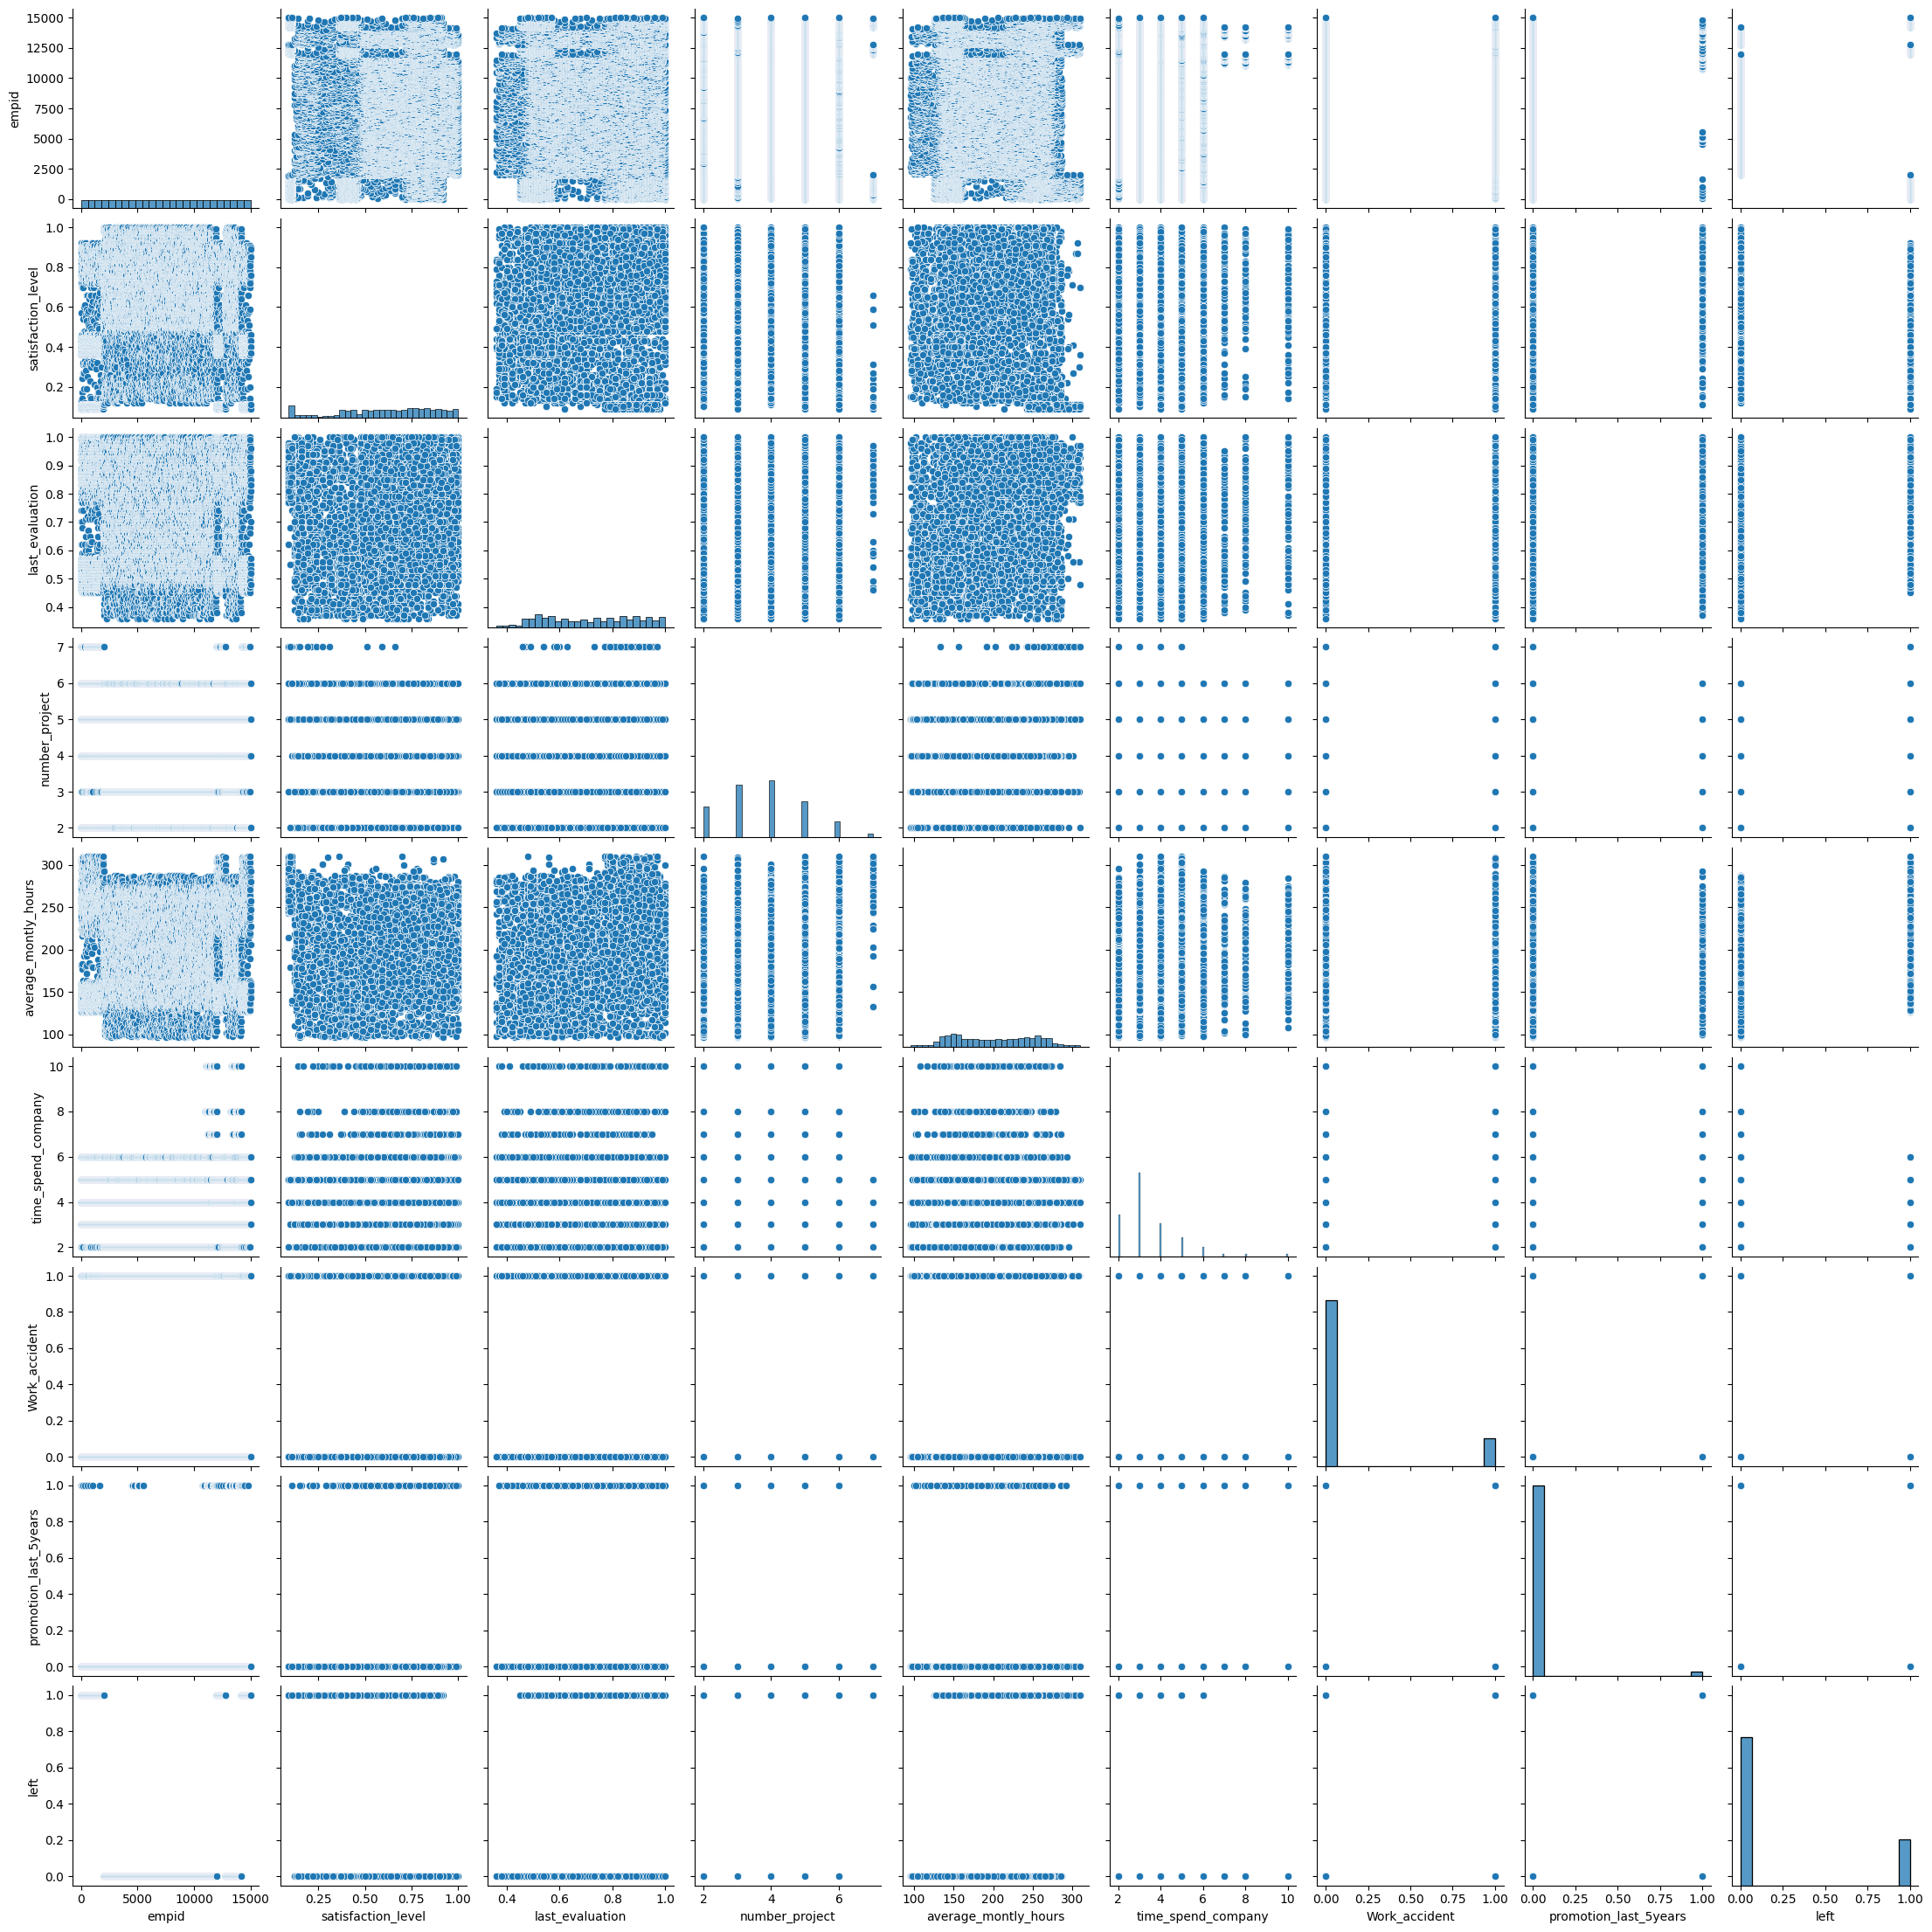

In [6]:
sns.pairplot(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [8]:
df = df.drop(columns=['empid'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,low,1
14995,0.37,0.48,2,160,3,0,0,low,1
14996,0.37,0.53,2,143,3,0,0,low,1
14997,0.11,0.96,6,280,4,0,0,low,1


In [9]:
df.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [10]:
df['satisfaction_level'].fillna(df['satisfaction_level'].mean(), inplace=True)

C:\Users\yuvra\AppData\Local\Temp\ipykernel_12200\3793018325.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['satisfaction_level'].fillna(df['satisfaction_level'].mean(), inplace=True)


In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [12]:
salary_dummies = pd.get_dummies(df['salary'], drop_first=True)

In [13]:
salary_dummies

,low,medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [14]:
df = pd.concat([df, salary_dummies], axis=1)

In [15]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,True,False
1,0.80,0.86,5,262,6,0,0,medium,1,False,True
2,0.11,0.88,7,272,4,0,0,medium,1,False,True
3,0.72,0.87,5,223,5,0,0,low,1,True,False
4,0.37,0.52,2,159,3,0,0,low,1,True,False


In [16]:
df = df.drop(columns=['salary'])

In [17]:
X = df.drop(labels='left', axis=1)
Y = df['left']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [19]:
X_train.shape
# len(Y_train)

(11999, 9)

In [20]:
Y_train.shape

(11999,)

In [21]:
print(Y_train)

12766    1
3536     0
10295    0
2137     0
14774    1
        ..
13123    0
3264     0
9845     0
10799    0
2732     0
Name: left, Length: 11999, dtype: int64


In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
# model_params = {
#     'RandomForestClassifier' : {
#         'model' : RandomForestClassifier(),
#         'params' : {
#             'n_estimators' : [10, 50, 100, 130],
#             'criterion': ['gini', 'entropy'],
#             'max_depth': range(2,4,1),
#             "max_features": ['auto', 'log2']
#         }
#     },
#     'XGBClassifier' : {
#         'model' : XGBClassifier(),
#         'params' : {
#             'n_estimators' : [10, 50, 100, 200],
#             'max_depth': [3,5,10,20],
#             'learning_rate' : [0.5, 0.1, 0.01, 0.001]
#         }
#     }
    
# }

In [24]:
# scores = []
# for model__name, mp in model_params.items():
#     model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['params'], cv=5, return_train_score=False)
#     model_selection.fit(X,Y)
#     scores.append({
#         'model': model__name,
#         'best_score' : model_selection.best_score_,
#         'best_params' : model_selection.best_params_
#     })

In [25]:
# score_df = pd.DataFrame(scores)

In [26]:
# score_df

In [27]:
model_xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=20, n_estimator=200)

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)


In [29]:
model_xgb.fit(X_train, Y_train)

[15:09:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=200, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [30]:
model_xgb.score(X_test, Y_test)

0.991

In [31]:
import joblib

In [32]:
joblib.dump(model_xgb, '../Model/v1')

['../Model/v1']